### Step 1: Importing Python Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Import Data

Here we are importing a real-world open sourced dataset to use for our assignment. Import your data here. 

Note the data can be found at the following URL: 'https://raw.githubusercontent.com/salexyun/Michener-AI-for-Clinician-Champions/main/medical_cost.csv'

Write your Step 2 code here in this cell

In [2]:
URL = 'https://raw.githubusercontent.com/salexyun/Michener-AI-for-Clinician-Champions/main/medical_cost.csv'
data = pd.read_csv(URL)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Step 3: Determine the dimenionality of the dataset. 

Print out the total number of patients in the dataset. Print out the different unique freatures that are available for each patient.

In [3]:
## Write your code for Step 3 in this cell
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [7]:
missing_values=data.isnull().sum()
missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Data Dictionary:

* age: age of the primary beneficiary - ratio (continuous variable)
* sex: sex of the beneficiary (male or female) - nominal (categorical variable)
* bmi: body mass index; a value derived from the mass and height of the beneficiary - interval (continuous variable)
* children: number of children covered by the insurance - ratio (discrete variable)
* smoker: whether the beneficiary smokes or not (yes or no) - nominal (categorical variable)
* region: residential area of the beneficiary in the U.S. - nominal (categorical variable)
* charges: individual medical costs billed by the insurance - ratio (continuous variable)

### Step 4: Data Analytics
Create a plot of your choosing showing the data distributions for the following:
1. Age 
2. Number of children covered by insurance 
3. BMI 
4. Smoking vs non-smoking 
5. Charges  

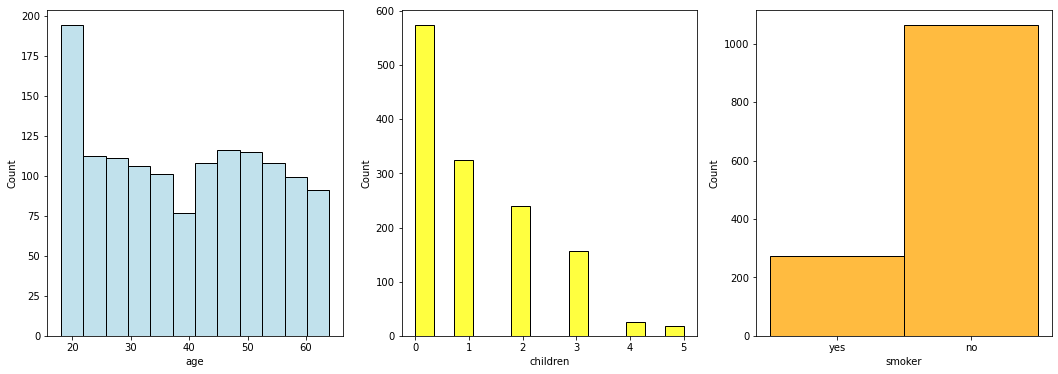

In [8]:
# Write Step 4 Code Here: 
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18,6))
plotage = sns.histplot(data.age, color = 'lightblue', ax=axes[0])
plotchild = sns.histplot(data.children, color = 'yellow', ax=axes[1])
plotsmoker = sns.histplot(data.smoker, color = 'orange', ax=axes[2])
plt.show()

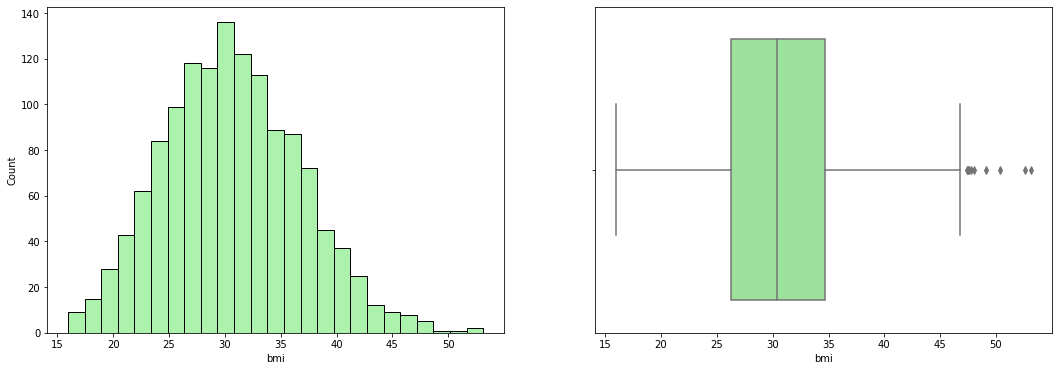

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
plot1 = sns.histplot(data.bmi, kde = False, color = 'lightgreen', ax=axes[0])
plot2 = sns.boxplot(data = data, x = 'bmi', color = 'lightgreen', ax=axes[1])
plt.show()

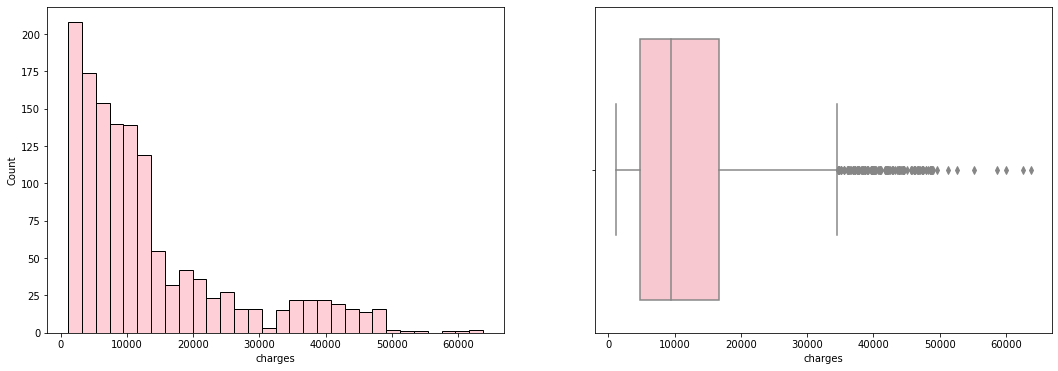

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
plot1 = sns.histplot(data.charges, kde = False, color = 'pink', ax=axes[0])
plot2 = sns.boxplot(data = data, x = 'charges', color = 'pink', ax=axes[1])
plt.show()

In [11]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Step 5: Use any method of your choosing to answer the following questions. 

Are there any associates between smoking vs non-smoking and age? 

In [12]:
data.smoker = data.smoker.map(dict(yes=1, no=0))
data.sex = data.sex.map(dict(male=1,female=0))
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
data.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


The correlation between smoking vs non-smoking and age is -0.067428, no association.

#### Step 6: Perform an analysis of your choosing on the data to determine if any of the features within the data are predictive of cost. 

In the interview we will ask you to explain how you approached this question. 

In [14]:
# Write Step 6 Code Here: 
X = data[['age','sex','bmi','children','smoker','region']]
X = pd.get_dummies(data=X, drop_first=True)
X.head()
import statsmodels.api as sm
from scipy import stats

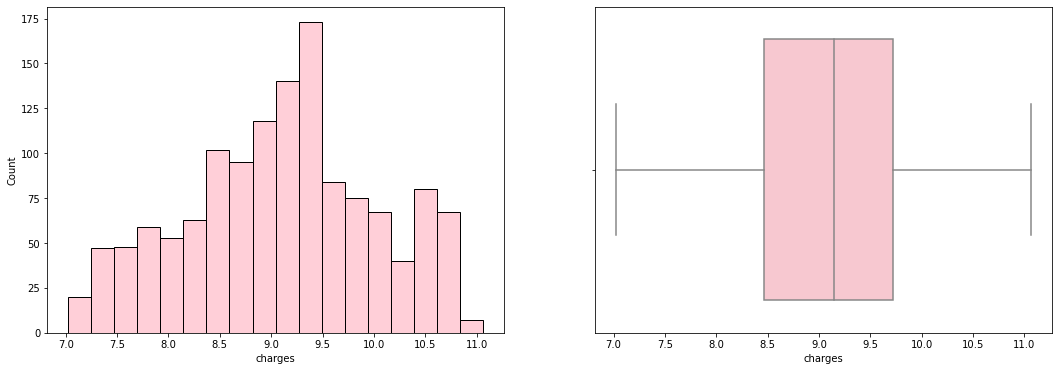

In [15]:
# Log transform a single column 
data['charges'] = np.log(data['charges'])
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18,6))
plot1 = sns.histplot(data.charges, kde = False, color = 'pink', ax=axes[0])
plot2 = sns.boxplot(data = data, x = 'charges', color = 'pink', ax=axes[1])
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
lmmodel = LinearRegression()
y = data['charges']
lmmodel.fit(X,y)
print('Intercept: \n', lmmodel.intercept_)
print('Coefficients: \n', lmmodel.coef_)

Intercept: 
 7.030558089523366
Coefficients: 
 [ 0.03458164 -0.07541644  0.01337482  0.10185685  1.55432279 -0.06378756
 -0.15719675 -0.12895222]


In [17]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:27:59   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0306      0.072  

In [18]:
np.exp(lmmodel.intercept_)

1130.6614444456202

In [19]:
(np.exp(lmmodel.coef_)-1)*100

array([  3.51865381,  -7.26427867,   1.34646658,  10.72249595,
       373.18809433,  -6.17957129, -14.54640843, -12.09840377])

Since p-value of **region** is greater than 0.05, we would not reject the null hypothesis, so these region is not statistically significant.

Then we can conclude that **age**, **sex**, **bmi**, **the number of children covered by insurance**, and **whether the beneficiary smokes or not** are the features would within predictive analysis of medical cost.
*   Holding all other features fixed, for a 1 year increase in Age, we expect to see about a 3.518% increase in the medical cost
*   Holding all other features fixed, the medical cost will be 7.264% lower for MALE compare to FEMALE
*   Holding all other features fixed, for a 1 unit increase in BMI, we expect to see about a 1.3468% increase in the medical cost
*   Holding all other features fixed, for a 1 more Child, we expect to see about a 10.722% increase in the medical cost
*   Holding all other features fixed, the medical cost will be 373.188% higher for SMOKER compare to NON-SMOKER

Text(0, 0.5, 'Predicted Y')

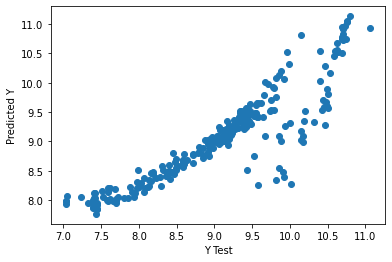

In [20]:
from sklearn.model_selection import train_test_split
X2 = data[['age','sex','bmi','children','smoker']]
y = data['charges']
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=101)
lmpredict = LinearRegression()
lmpredict.fit(X2_train,y_train)
predictions = lmpredict.predict(X2_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.27135723968430475
MSE: 0.17852875494422138
RMSE: 0.4225266322307049


/Users/Cloris/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

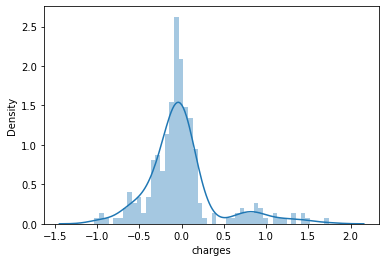

In [22]:
sns.distplot((y_test-predictions),bins=50)